# Notebook to Test Stock Models

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from instruments import BrownianStock

## Model 1: Geometric Brownian Motion

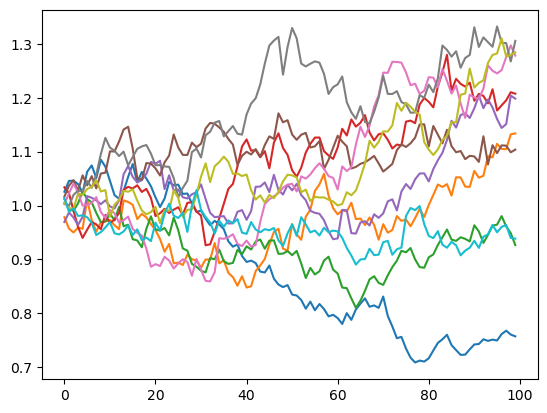

In [3]:
stock = BrownianStock(mu=0, sigma=0.3)
stock.simulate(n_paths=10)
stocks = np.array(stock.spot)
for stock in stocks:
    plt.plot(stock)

## Testing European Option

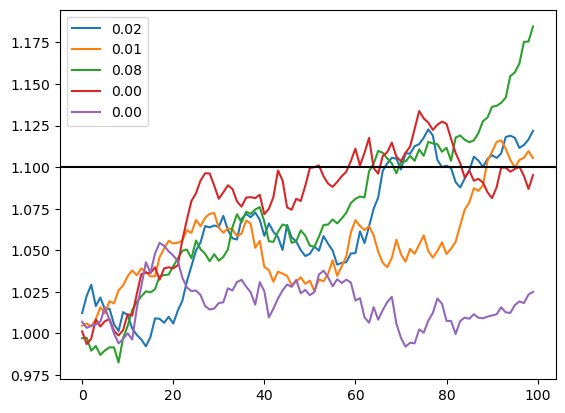

In [1]:
from instruments import BrownianStock, EuropeanOption
import torch
import numpy as np
import matplotlib.pyplot as plt

_ = torch.manual_seed(42)
underlier = BrownianStock(mu=0.2, sigma=0.1)
strike = 1.1
maturity = 0.4
derivative = EuropeanOption(underlier, call=True, strike=strike, maturity=maturity)
derivative.simulate(n_paths=5)
stocks = np.array(underlier.spot)
payoffs = derivative.payoff

for (stock, payoff) in zip(stocks, payoffs):
    plt.plot(stock, label=f'{payoff:.2f}')
    
plt.axhline(y=strike, c='k')
plt.legend(loc='best')

## Testing Lookback Option

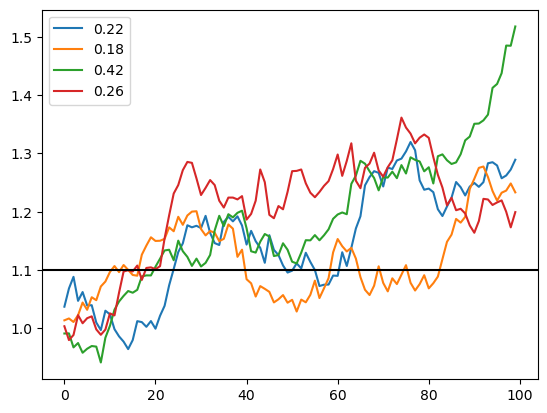

In [2]:
from instruments import BrownianStock, LookbackOption
import torch
import numpy as np
import matplotlib.pyplot as plt

_ = torch.manual_seed(42)
underlier = BrownianStock(mu=0.4, sigma=0.3)
strike = 1.1
maturity = 0.4
derivative = LookbackOption(underlier, call=True, strike=strike, maturity=maturity)
derivative.simulate(n_paths=4)
stocks = np.array(underlier.spot)
payoffs = np.array(derivative.payoff)

for stock, payoff in zip(stocks, payoffs):
    plt.plot(stock, label=f'{payoff:0.2}')
plt.axhline(y=strike, c='k')
plt.legend(loc='best')

## Model 2: Cox-Ingersol-Ross Model

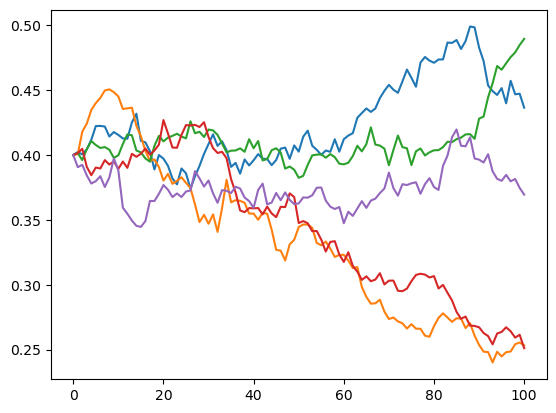

In [1]:
from instruments import CIRStock
import matplotlib.pyplot as plt
import torch
import numpy as np

kappa, theta, sigma, r0 = 0.3, 0.1, 0.2, 0.4

_ = torch.manual_seed(42)
underlier = CIRStock(kappa, theta, sigma, r0)
underlier.simulate(n_paths=5)
stocks = np.array(underlier.spot)

for stock in stocks:
    plt.plot(stock)